# ECS7024P Coursework 1

##  1. Introduction

### 1.1 The Dataset(s)

The dataset is based on ‘lower layer super output areas’ (LSOA); see the description from the Office for National Statistics (ONS)
at https://www.ons.gov.uk/methodology/geography/ukgeographies/statisticalgeographies. There are 33,755 LSOA in England. The data were obtained from https://www.nomisweb.co.uk/sources/census_2021_bulk (dataset TS007A) with some changes: i) data for Wales has been deleted , ii) columns have been renamed to ensure there are no spaces, iii) the PartOfCode and PartOfName have been added.

The variables are as follows:

| Variable | Type    | Description                                                                                         |
|----------|---------|-----------------------------------------------------------------------------------------------------|
| LSOAName | String  | Name of the LSOA                                                                                     |
| LSOACode | String  | Code of the LSOA                                                                                     |
| PartOfCode | String | Code of a larger area containing this LSOA                                                          |
| PartOfName | String | Name of the larger area containing this LSOA                                                        |
| Total    | Integer | Total number of usual residents in this LSOA at the time of the 2021 census                          |
| Age4Under, Age5to9, Age10to14, Age15to19, Age20to24, Age25to29, Age30to34, Age35to39, Age40to44, Age45to49, Age50to54, Age55to59, Age60to64, Age65to69, Age70to74, Age75to79, Age80to84, Age85Over | Integer | Breakdown of the number of usual residents in this LSOA at the time of the 2021 census in 5 year age ranges (plus an open-ended range for ages 85 and over). |


##  2. Requirements

### 2.1: Bar Chart of the Age Profile

The aim of this section is to show the proportions of a population in each age range.
Complete the following steps:

##### **2.1.1. Total Population of England (by Age Groups)**

- Calculate the total population of England.
- Plot a bar chart showing the proportions of the total England population in each age range.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('LSOA_data.csv')
df

,LSOAName,LSOACode,PartOfCode,PartOfName,Total,Age4Under,Age5to9,Age10to14,Age15to19,Age20to24,...,Age40to44,Age45to49,Age50to54,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,Age80to84,Age85Over
0,City of London 001A,E01000001,E09000001,City of London,1473,52,34,32,23,90,...,114,105,89,73,83,119,102,57,57,35
1,City of London 001B,E01000002,E09000001,City of London,1384,33,24,22,31,100,...,92,98,122,88,87,76,69,59,43,30
2,City of London 001C,E01000003,E09000001,City of London,1613,39,32,33,23,96,...,111,113,155,118,111,86,85,50,31,33
3,City of London 001E,E01000005,E09000001,City of London,1101,52,45,35,89,118,...,61,58,87,82,67,35,26,17,14,12
4,Barking and Dagenham 016A,E01000006,E09000002,Barking and Dagenham,1842,153,127,110,122,124,...,164,153,121,85,70,66,41,18,17,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33750,Vale of White Horse 014H,E01035758,E07000180,Vale of White Horse,1169,39,45,58,38,63,...,67,76,81,57,49,57,70,46,70,77
33751,Vale of White Horse 015G,E01035759,E07000180,Vale of White Horse,1519,116,107,82,66,62,...,91,100,111,106,102,56,75,58,29,32
33752,Vale of White Horse 015H,E01035760,E07000180,Vale of White Horse,1610,206,152,97,49,59,...,156,62,41,30,24,14,15,13,20,33
33753,Vale of White Horse 015I,E01035761,E07000180,Vale of White Horse,1609,184,121,98,58,62,...,113,84,66,50,37,50,40,23,32,29


In [2]:

#Set the LSOA Codes as index 
lsoa_index_df= df.set_index('LSOACode')

# Extract age groups only
age_groups = lsoa_index_df.columns[4:] 

# Proportion of the population in each age group
total_population = lsoa_index_df['Total'].sum()
england_age_totals = lsoa_index_df[age_groups].sum()
england_age_proportions = england_age_totals / total_population
england_age_proportions

Age4Under    0.054467
Age5to9      0.059279
Age10to14    0.060424
Age15to19    0.056981
Age20to24    0.060442
Age25to29    0.065771
Age30to34    0.069971
Age35to39    0.067186
Age40to44    0.063383
Age45to49    0.063775
Age50to54    0.069177
Age55to59    0.067379
Age60to64    0.057639
Age65to69    0.048989
Age70to74    0.049507
Age75to79    0.036090
Age80to84    0.025247
Age85Over    0.024293
dtype: float64

Text(0.5, 0, 'Age Groups')

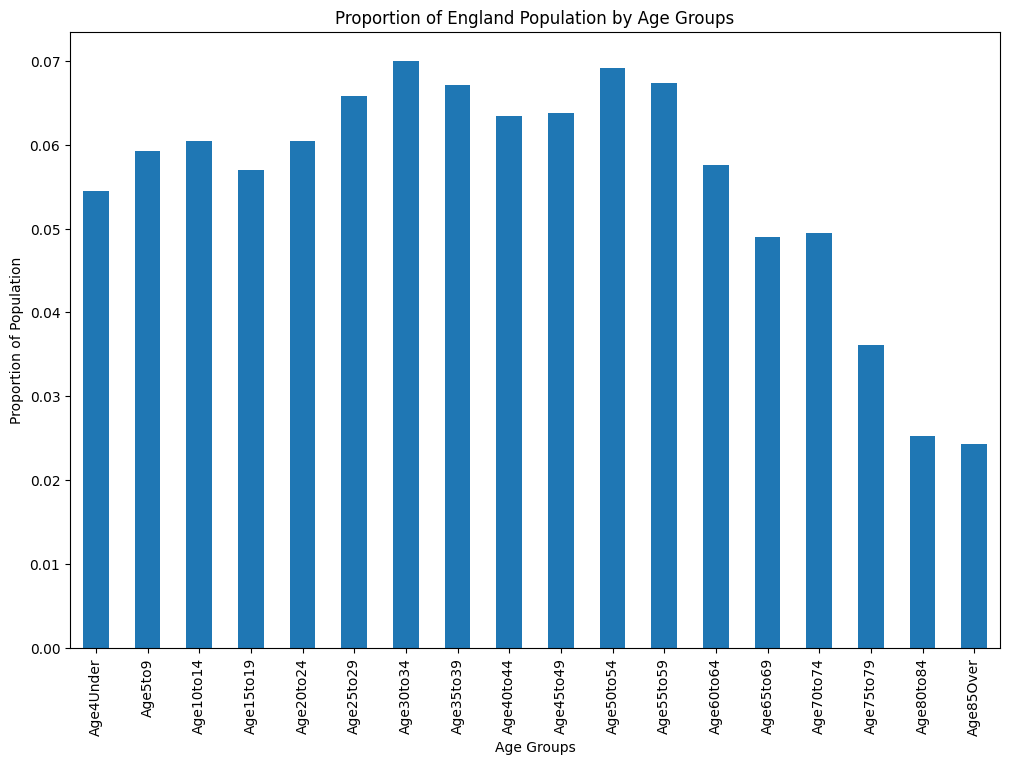

In [3]:
#Bar Chart
england_age_proportions.plot(kind='bar', figsize=(12,8))
plt.title('Proportion of England Population by Age Groups')
plt.ylabel('Proportion of Population')
plt.xlabel('Age Groups')

##### **2.1.2 Comparision of Population in Selected LSOAS and Total Population in England (by Age Groups)**

 - Using a bar chart, compare the population of each age range for the following LSOAs: 

    - E01005044 (Bury 026E), 
    - E01020395 (Dorset 024A), 
    - E01009136 (Birmingham 014E), and
    - Total population of England.

In [4]:
# #Set the LSOA Codes as index 
lsoa_index_df= df.set_index('LSOACode')

# Extract data for the interested LSOAs
lsoa_codes = ['E01005044', 'E01020395', 'E01009136']
interested_LSOA = lsoa_index_df.loc[lsoa_codes]

#Find the proportion for each age group in interested LSOAs 
interested_LSOA_proportion = interested_LSOA[age_groups].div(interested_LSOA['Total'].values,axis=0)


#Add England total population into intrested df for comparision 
interested_LSOA_proportion.loc['England'] = england_age_proportions   #england_age_proportions is defined in 2.1(a)
interested_LSOA_proportion

,Age4Under,Age5to9,Age10to14,Age15to19,Age20to24,Age25to29,Age30to34,Age35to39,Age40to44,Age45to49,Age50to54,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,Age80to84,Age85Over
LSOACode,,,,,,,,,,,,,,,,,,
E01005044,0.109638,0.139215,0.149414,0.098419,0.042325,0.048955,0.062213,0.067313,0.059663,0.052014,0.039266,0.027537,0.030597,0.029067,0.018358,0.013259,0.008669,0.004080
E01020395,0.011542,0.022036,0.025708,0.031480,0.038825,0.028856,0.019412,0.019412,0.032004,0.039349,0.044596,0.061910,0.078699,0.086569,0.113326,0.109654,0.101784,0.134837
E01009136,0.060262,0.057987,0.051734,0.063104,0.050597,0.057987,0.072200,0.084707,0.046617,0.050597,0.055713,0.057987,0.063673,0.060830,0.054576,0.047186,0.032405,0.031836
England,0.054467,0.059279,0.060424,0.056981,0.060442,0.065771,0.069971,0.067186,0.063383,0.063775,0.069177,0.067379,0.057639,0.048989,0.049507,0.036090,0.025247,0.024293


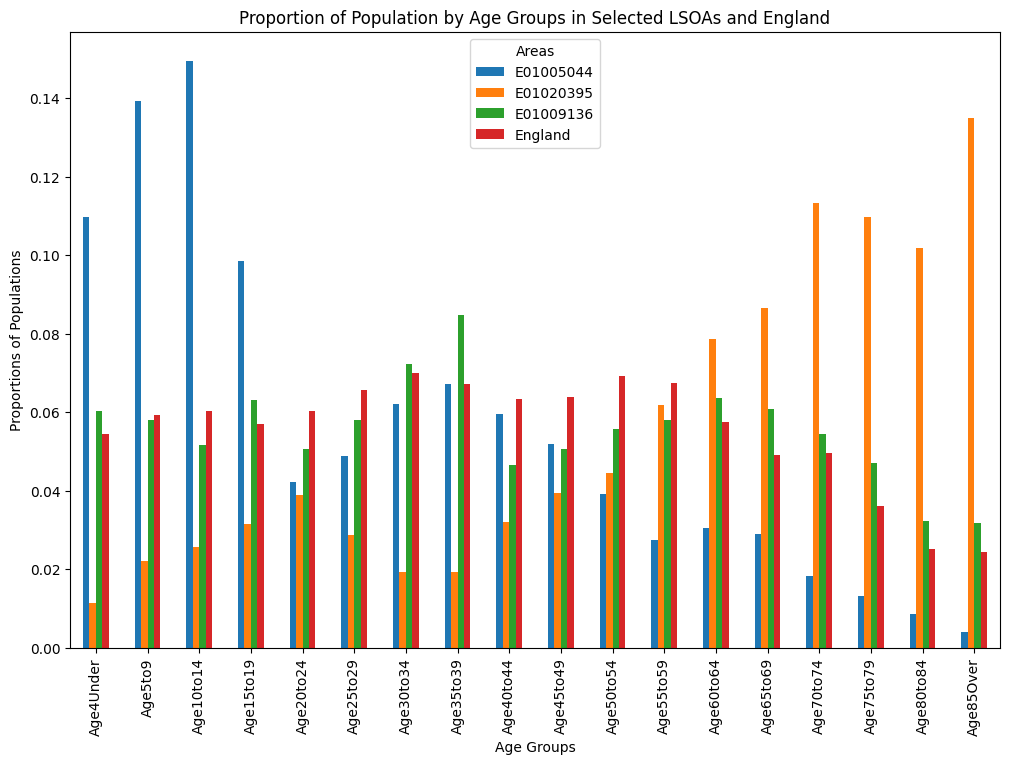

In [5]:
# Bar chart
# Transpose the interested_LSOA_proportion, letting x-axis= age_groups instead of the interested LSOA Code.
interested_LSOA_proportion.transpose().plot(kind='bar', figsize=(12,8))
plt.title('Proportion of Population by Age Groups in Selected LSOAs and England')
plt.xlabel('Age Groups')
plt.ylabel('Proportions of Populations')
plt.legend(title='Areas')

##### **2.1.3 Analysis - Reasons of different age distribution**

- Suggest some reasons why the age distribution in some areas may differ from the national average. 

**Reason 1 : Living and Housing Cost** 

(a) E01005044,Bury (Blue): Bury likely has a lower living costs and more affordable housing, which attracts younger families. This may lead to a higher birth rates which would explain the higher proportions of younger population (aged 0 to 19) compared to the national average.

(b) E01020395, Dorset (Orange): Dorset is a costal area that may have a higher housing price, which discourage the youngsters from settling there but attracting the rich elderly who seeks for a peaceful and quiet neighbourhood after their retirement. As a results, the older population proportion (aged 55 and above)  is much higher than the national average, while the population aged 0 to 54 is much lower.

(c) E01009136, Birmingham (Green): Birmingham has a wide range of housing options in different area, which attracts both the youngsters and the elderly to stay in Birmingham. This explain the higher proportion of adults (aged 30 -39) and old people (aged 60 and above) compared to the national average. 

**Reason 2: Education** 

(a) E01005044,Bury (Blue): Bury probably does not offer a wide range of tertiary education and hence students are moving out from Bury and study at another LSOA, resulting lower proportions in the age group of 20 to 29 compared to the national average.

(b) E01020395, Dorset (Orange): Similar to Bury, Dorset has a lower proportion of youngsters (aged from 0 to 24) compared to the national average, as it  may experience youngsters moving to other big cities for education.

(c) E01009136, Birmingham (Green): Birmingham's diverse and famous education instituitions attract many teenagers (aged 15 to 19)  leading to a higher proportion individuals in this age range compared to the national average.

**Reason 3: Job Oppurtunities**

(a) E01005044,Bury (Blue): Bury probably offer some job markets, which explain the rising proportions of age group from 30 to 39 compared to the national average. 

(b) E01020395, Dorset (Orange): The population aged from 30 to 54 has lower proportion compared to the national average. This may because of the younsgters who move to big cities for education, may continue to stay there for employment and hence the low proportion of these age group population recorded in Dorset.

(c) E01009136, Birmingham (Green): Birmingham as one of the major city in London, offers a variety of job oppurtunities, attracting inward migration of workers and hence resulting in the higher proportion of population aged 30 to 39 in Birmingham compared to the national average. 


### 2.2 : Distribution of the Younger, Older and Median Ages in Each LSOA

In this section, we will analyze the population distribution by age, focusing on the proportions of younger and older residents in each LSOA, as well as the distribution of median age in each LSOA.

#### **2.2.1. Add new variables - Younger, Older Proportion & Median Age**

- Three new variables(i.e. columns) are added to the data frame. The new columns are:

**a. The proportion of younger residents on the LSOA**

- These are the counts in the first four age groups(Age4Under, Age5to9, Age10to14, Age15to19), divided by the total for the LSO area.

In [6]:
younger_age_groups = df.columns[5:9]
lsoa_index_df['Younger_Proportion'] = lsoa_index_df[younger_age_groups].sum(axis=1)/lsoa_index_df['Total']
lsoa_index_df[['Total', 'Age4Under', 'Age5to9', 'Age10to14', 'Age15to19', 'Younger_Proportion']]

,Total,Age4Under,Age5to9,Age10to14,Age15to19,Younger_Proportion
LSOACode,,,,,,
E01000001,1473,52,34,32,23,0.095723
E01000002,1384,33,24,22,31,0.079480
E01000003,1613,39,32,33,23,0.078735
E01000005,1101,52,45,35,89,0.200727
E01000006,1842,153,127,110,122,0.277959
...,...,...,...,...,...,...
E01035758,1169,39,45,58,38,0.153978
E01035759,1519,116,107,82,66,0.244240
E01035760,1610,206,152,97,49,0.313043


**b. The proportion of older residents in the LSOA.**

- These are the counts in the last five age groups, starting with Age65to69, divided by the total for the LSO area.

In [7]:
older_age_groups = df.columns[18:23]
lsoa_index_df['Older_Proportion'] = lsoa_index_df[older_age_groups].sum(axis=1)/ lsoa_index_df['Total']
lsoa_index_df[['Total', 'Age65to69', 'Age70to74', 'Age75to79', 'Age80to84', 'Age85Over','Older_Proportion']]

,Total,Age65to69,Age70to74,Age75to79,Age80to84,Age85Over,Older_Proportion
LSOACode,,,,,,,
E01000001,1473,119,102,57,57,35,0.251188
E01000002,1384,76,69,59,43,30,0.200145
E01000003,1613,86,85,50,31,33,0.176689
E01000005,1101,35,26,17,14,12,0.094460
E01000006,1842,66,41,18,17,16,0.085776
...,...,...,...,...,...,...,...
E01035758,1169,57,70,46,70,77,0.273738
E01035759,1519,56,75,58,29,32,0.164582
E01035760,1610,14,15,13,20,33,0.059006



**c. An estimate of the median age in the LSOA.**

- To calculate the median age, the following steps are completed:

1. Calculate Cumulative Fractions:
   - Cumulative fraction (each age group) = Cumulative sum of the number of people in each age group, divided by the total population.

2. Find the Age Group with the Median:
   - Find the first age group with cumulative fraction is greater than or equal to 50%. This is the age group containing the median age. 

3. Interpolate to Calculate the Exact Median Age:
   - If the cumulative fraction at the identified age group exceeds 50%, an linear interpolation is done to find the exact median age within that group. 
   - The interpolation is done using the fraction of people needed to reach the median (i.e., 50%) relative to the total number of people in that age group.
   
4. Median Age:
   - The exact median age is calculated by adding the interpolated years to the lower boundary of the identified age group.


**Note:** 
The function `find_median()` is refering from the appendix notes provided by Dr.William Marsh.

In [8]:
import numpy as np

#Define a function to find the median age
def find_median(no_of_people):
    # Calculate the cumulative fractions for the given counts
    cum_frac = np.cumsum(no_of_people) / np.sum(no_of_people)
    
    # Find the first age range where the cumulative fraction >= 50%
    index = 0
    while cum_frac.iloc[index] < 0.5:
        index += 1
    
    # Interpolate within the identified age range
    prev_frac = 0
    if index > 0:
        prev_frac = cum_frac.iloc[index - 1]
    
    remaining_frac = 0.5 - prev_frac
    frac_increase = cum_frac.iloc[index] - prev_frac
    
    lower_age_bound = index * 5   # Lower age boundary
    median_age = lower_age_bound + 5 * (remaining_frac / frac_increase)
    
    return median_age

#Find the median age in each LSOAs 
lsoa_index_df['Median_Age'] = lsoa_index_df[age_groups].apply(find_median,axis=1)
lsoa_index_df[['Total','Median_Age']]


,Total,Median_Age
LSOACode,,
E01000001,1473,44.276316
E01000002,1384,43.913043
E01000003,1613,43.896396
E01000005,1101,34.851695
E01000006,1842,34.454023
...,...,...
E01035758,1169,44.888060
E01035759,1519,40.027473
E01035760,1610,31.716102


#### **2.2.2 Histograms - Summary Statistics (Total Population, Younger & Older Proportion, Median Age) and Analysis**

- Show the summary statistics and the distributions of the total population, the younger and older proportions and the median age across the LSOAs in histograms. 
- Briefly comment on the shapes of these distributions (avoiding statistical language).


In [9]:
#Summary Statistics
lsoa_index_df[['Total','Younger_Proportion','Older_Proportion','Median_Age']].describe()

,Total,Younger_Proportion,Older_Proportion,Median_Age
count,33755.000000,33755.000000,33755.000000,33755.000000
mean,1673.532543,0.227832,0.189168,42.032147
std,353.289631,0.055301,0.085520,7.782742
min,999.000000,0.018081,0.000736,14.530516
25%,1443.000000,0.192297,0.123995,36.128752
50%,1608.000000,0.223183,0.182751,41.460674
75%,1835.000000,0.258689,0.246851,47.821934
max,9900.000000,0.628793,0.655409,71.875000


Text(0, 0.5, 'Frequency')

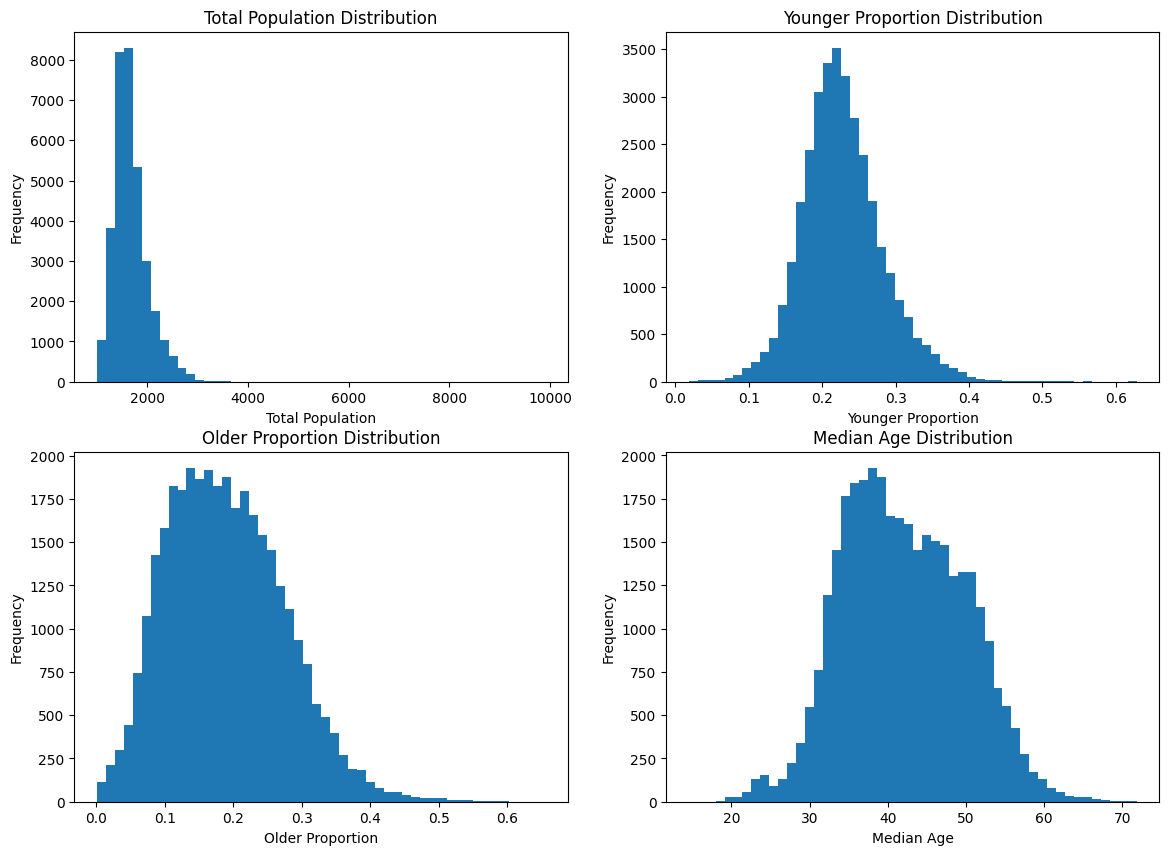

In [10]:
#Plot histogram 
fig,((a1,a2),(a3,a4)) = plt.subplots(2, 2, figsize=(14, 10))

# Histogram 1: Distribution of Total Population 
lsoa_index_df['Total'].plot(kind='hist',bins=50, ax=a1)
a1.set_title('Total Population Distribution')
a1.set_xlabel('Total Population')
a1.set_ylabel('Frequency')

#Histogram 2: Distribution of Younger Proportions
lsoa_index_df['Younger_Proportion'].plot(kind='hist', bins=50, ax=a2)
a2.set_title('Younger Proportion Distribution')
a2.set_xlabel('Younger Proportion')
a2.set_ylabel('Frequency')

#Histogram  3: Distribution of Older Proportion
lsoa_index_df['Older_Proportion'].plot(kind='hist', bins=50, ax=a3)
a3.set_title('Older Proportion Distribution')
a3.set_xlabel('Older Proportion')
a3.set_ylabel('Frequency')

# Histogram for Estimated Median Age
lsoa_index_df['Median_Age'].plot(kind='hist', bins=50, ax=a4)
a4.set_title('Median Age Distribution')
a4.set_xlabel('Median Age')
a4.set_ylabel('Frequency')


Comments: 

**(a) Total Population Distribution:**
The distibution is skewed to the right, showing that most of the LSOAs have a smaller populations, with the peak in the range of 1000 to 1800 people, and only a few LSOAs having a very large populations, exceeding 3000 individuals.

**(b) Younger Proportion Distribution:**
The younger populations have a nearly balanced distribution  across LSOAs, with most areas fall in the central range proportion of 0.15 to 0.30,and peaking at around 0.22.A small number of LSOAs have proportions of younger populations below 0.15 or above 0.35. 

**(c)Older Proportion Distribution:**
The distribution is slightly skewed to the right, as the elderly population is mostly concentrated at a proportion between 0.1 to 0.25. Only a few LSOAs have higher older proportions of more than 0.35.  

**(d) Median Age Distribution:**
The median age is fairly evenly spread out across the each LSOAs, with most regions having a median age between 35 to 52. There are a few LSOAs have notably younger populations (aged below 35) or much elderly populations (aged above 55).


#### **2.2.3 Median Age (National-level vs LSOAs-level) and Analysis**

- Calculate the median age for the whole of England.
- Compare the national-level median age with the 50th percentile value of the distribution of median ages by LSOA. 
- Explain why the two values differ a little.

In [11]:
#Median age for England Population 
england_median_age = find_median(england_age_proportions)

#50th percentile value of LSOA median age
median_lsoa_median_age = lsoa_index_df['Median_Age'].median()

print('The median age for the whole England population is', england_median_age)
print('The 50th percentile value of LSOA median age is', median_lsoa_median_age)

The median age for the whole England population is 40.4322611250074
The 50th percentile value of LSOA median age is 41.46067415730337


In [12]:
#Referecing puporse for explaination below
#Max of younger proportion = 0.6287.... (from .describe())
lsoa_index_df.loc[(lsoa_index_df['Younger_Proportion'] < 0.63) & (lsoa_index_df['Younger_Proportion'] > 0.60)]


,LSOAName,PartOfCode,PartOfName,Total,Age4Under,Age5to9,Age10to14,Age15to19,Age20to24,Age25to29,...,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,Age80to84,Age85Over,Younger_Proportion,Older_Proportion,Median_Age
LSOACode,,,,,,,,,,,,,,,,,,,,,
E01005614,Salford 031C,E08000006,Salford,3098,548,615,426,287,129,175,...,43,41,36,29,14,13,13,0.605552,0.033893,14.530516
E01007862,Sheffield 038C,E08000019,Sheffield,3542,32,38,57,2049,525,114,...,62,63,61,75,49,28,34,0.614342,0.069735,19.011713
E01013378,York 023B,E06000014,York,6219,29,48,49,3762,1392,207,...,68,59,63,55,60,44,47,0.625181,0.043255,18.965311
E01014380,Bath and North East Somerset 012A,E06000022,Bath and North East Somerset,4214,51,71,95,2426,471,53,...,97,94,114,117,84,67,92,0.627195,0.112482,18.895301
E01034936,Birmingham 079G,E08000025,Birmingham,2702,49,45,53,1552,238,68,...,46,43,52,66,77,52,80,0.628793,0.121021,18.878866


Explaination: 

The median age of the whole England is proportion-weighted of different age groups across all LSOAs. LSOAs with extreme young population has lower the national median age. In this areas, a significant proportion of the population is concentrated in younger age groups, skewing the overall median down. 

For example, E01007862(Sheffield 038C), E01013378(York 023B), E01014380 (Bath and North East Somerset 012A) and E01034936 (Birmingham 079G) and  have a large proportion of very young median age of 18 to 19. In addition, E01005614(Salford 031C) had the lowest median age among the LSOas of only about 14. In those data, about 0.60 to 0.62 proportion of the population are from the younger age group (aged 0 to 19). Additionally, there are more LSOAs having younger population as supported by the higher count of LSOAs in the histogram of younger porportion in 2.2.2, when comparing to the older proportion. As a result, decreasing the overall median age of whole England population. 

On the other hand, the median of the LSOA median age is more 'resistant' to extreme values as it treats all LSOAs equally, regardless the population size. This is because the final median is based on the individual median age from each LSOA. 

Hence, in the LSOA-level median, LSOAs with extreme young population don't have the same wieghtage of influence as it posed in the national-level median. As a result, the median of the LSOAs median age is slighlty higher than the national median age as the effect of the extreme values are treated equally and diluted in the calculation of LSOA-level median.

### 2.3: Comparing the Median Age Distributions by Area Type

The aim of this section is to compare distributions, grouping the LSO areas by type. The area
types are given by the PartOfCode variable, as follows.


| First 3 Characters of PartOfCode|Type of Area  |                                                                     
|-------|---------|
| E06 | Unitary Authorities: typically more urban areas. One example is code E06000004 which is Stockton-on-Tees |
| E07 | Non-metropolitan Districts: more rural. One example is E07000085 which is East Hampshire. |
| E08 | Metropolitan Districts: more urban areas. One example is Coventry with code E08000026. |
| E09 | London Borough: one example is E09000030 Tower Hamlets which includes QMUL’s Mile End campus |


Complete the following steps:


#### **2.3.1. Area Type**

- Add the type of area to each LSO area. 
- Group the data by the area type based on the first three characters of the `PartOfCode`.


In [13]:
#Define a function to classify the area type in each LSOA
def area_type(part_of_code):
    first_3_char = part_of_code [:3]
    if first_3_char == 'E06':
        return 'Unitary Authorities'
    elif first_3_char == 'E07':
        return 'Non-metropolitan Districts'
    elif first_3_char == 'E08':
        return 'Metropolitan Districts'
    elif first_3_char == 'E09':
        return 'London Borough'
    else:
        return 'Other'


lsoa_index_df['Area_type'] = lsoa_index_df['PartOfCode'].apply(area_type)

#Groupby 
grouped_by_area_type = lsoa_index_df.groupby('Area_type')
lsoa_index_df[['PartOfCode','PartOfName','Area_type']]

,PartOfCode,PartOfName,Area_type
LSOACode,,,
E01000001,E09000001,City of London,London Borough
E01000002,E09000001,City of London,London Borough
E01000003,E09000001,City of London,London Borough
E01000005,E09000001,City of London,London Borough
E01000006,E09000002,Barking and Dagenham,London Borough
...,...,...,...
E01035758,E07000180,Vale of White Horse,Non-metropolitan Districts
E01035759,E07000180,Vale of White Horse,Non-metropolitan Districts
E01035760,E07000180,Vale of White Horse,Non-metropolitan Districts


#### **2.3.2. KDE - Median Age Distrubution (by Areas)**

- Kernel density estimate (KDE) is used to plot and compare the distributions of the median age for the 4 different areas.

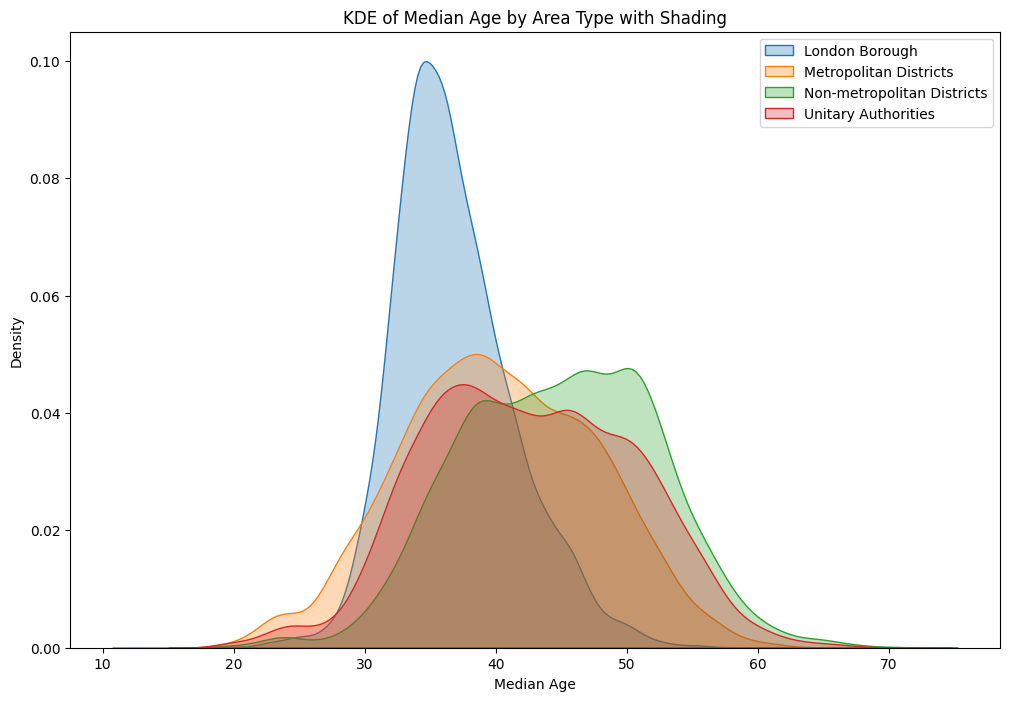

In [14]:
import seaborn as sns

plt.figure(figsize=(12, 8))

for area_type, data in grouped_by_area_type:
    sns.kdeplot(data['Median_Age'], fill=True, label=area_type, alpha=0.3)

plt.title('KDE of Median Age by Area Type with Shading')
plt.xlabel('Median Age')
plt.ylabel('Density')
plt.legend()



#### **2.3.3. Analysis on Median Age Distrubution (by Areas)**

- Comment briefly on the differences between the distribution for the four area types.


Comments: 

**(a) London Borough (Blue)**

The median age distribution is right-skewed, indicating that most areas in London Boroughs have younger populations, with a median age peaking around 35 years - the lowest among the four area types. Being a highly urbanised area with numerous job oppurtunites and high-quality education, these areas tend to attract working-age individuals, younger professionals and students. Additionally, the distribution is more compact, wih less spread, reflecting less variation in the median age, when comparing to other three area types.

**(b) Metropolitan Districts (Orange)**

The distribution is slightly right-skewed but closer to a normal distribution when compared to London Boroughs. Metroplitan districts tend to have a slighty older population, with a peak around 40 years (slightly higher than London Borough). This distribution also have a wider spread than in London Boroughs, as there are more areas with median ages reaching up to 60, suggesting a more balanced age distribution across the districts.

**(c) Non-metropolitan Districts (Green)**

In comparison to other three distirbution, this distribution is the most dispersed and widespread, with the median age ranging from 20 to 70. This distribution is skewed to the left, leaning towards the older ages, with a peak around 50 years - the highest among the four area types. This suggests that most of the non-metropolitan districts generally have older population, as rural areas tend to be quieter and more peaceful, attracting older residents, especially the retirees.

**(d) Unitary Authorities (Red)**

Unitary Authorities showed a right-skewed distribution of median age, with a median age peaking around 38 years (slightly older than London Borough but younger than the Metropolitan Distrcits). This distribution also have a broader range of median ages distribution than the London Borough and Metropolitan Districts, ranging from 20 to 60 years. Similar to the Metropolitan Districts, the unitary authorities have a more balanced age distribution across the areas.


### 2.4: Classification of Unusual Areas by Proportions

The aim of this section is to look at the relationship between the younger and older proportions across the LSO areas. Complete the following steps:

#### **2.4.1 Scatter Plot (Younger vs Older Proportion)**
- Draw a scatter plot of the younger proportion versus the older proportion, with each LSO area as one data point.

<Figure size 1200x800 with 0 Axes>

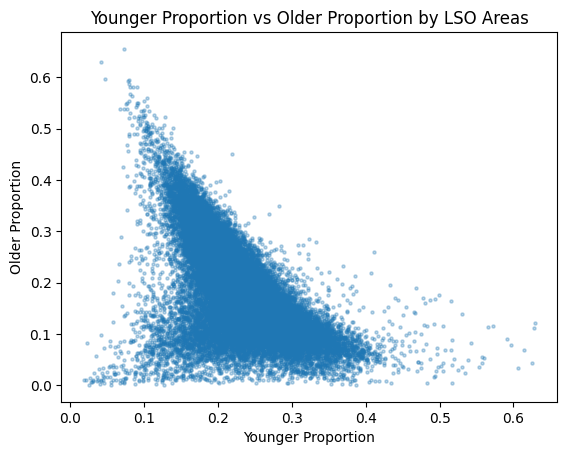

<Figure size 1200x800 with 0 Axes>

In [15]:
plt.scatter (lsoa_index_df['Younger_Proportion'], lsoa_index_df['Older_Proportion'],alpha = 0.3, s=5)
plt.title('Younger Proportion vs Older Proportion by LSO Areas')
plt.xlabel ('Younger Proportion')
plt.ylabel ('Older Proportion')
plt.figure (figsize= (12,8))

#### **2.4.2 Analysis of Scatter Plot**
- Briefly comments on the overall shape of this scatter plot, considering both the area containing most points and the extremes.

Comments :

The sactter plot generally showed a negative relationship between the younger and older proportions, where LSOAs with a higher proportion of younger populations tend to have a lower proportion of older populations, and vice versa. From the graph above, it is suggested that most of the LSOAs have a higher proportion of younger populations and lower proportion of older populations. This is evident from the concentration of data points at the lower-middle part of the plot, with younger proportions ranging from 0.15 to 0.40 and older proportion from 0.05 to 0.3.

The plot showed a roughly triangular shape, with three 'extreme' corners. In the top-left corner, there are a few LSO areas exhibit very high older proportions of more than 0.5. These areas most probably are more rural or costal area which attracts the elderly and retirees. While at the bottom-right corner, a few LSOAs show very high younger proportions of above 0.45, and these areas are likely to be more urban areas or universities town which are mostly occupied by younger populations.The third extreme corner, located at the bottom-left, showing a few LSOAs with low proportion in both younger and older population, which is most likely dominated by working-age population. 

#### **2.4.3 Identify Extremes**

- The shape is roughly triangular, with three ‘extreme’ corners and give the three extreme areas suitable names. 
- Define rules using ranges of the two proportions to classify each LSOA as ‘normal’ (most areas) or belonging to one of the extremes (a few areas).
- Add a variable with the class of each area to the data frame.

In [16]:
# Define a function to classify each LSOA based on younger and older proportions
def classify_lsoa_area(df):
    young_prop = df['Younger_Proportion']
    old_prop = df['Older_Proportion']
    
    if young_prop > 0.40 and old_prop < 0.15:
        return 'Youngsters'
    elif young_prop < 0.15 and old_prop > 0.40:
        return 'Elderly'
    elif young_prop < 0.15 and old_prop < 0.15:
        return 'Workers'
    else:
        return 'Normal'

# Add new variable
lsoa_index_df['Area_Class'] = lsoa_index_df.apply(classify_lsoa_area, axis=1)
lsoa_index_df[['Younger_Proportion', 'Older_Proportion', 'Area_Class']]


,Younger_Proportion,Older_Proportion,Area_Class
LSOACode,,,
E01000001,0.095723,0.251188,Normal
E01000002,0.079480,0.200145,Normal
E01000003,0.078735,0.176689,Normal
E01000005,0.200727,0.094460,Normal
E01000006,0.277959,0.085776,Normal
...,...,...,...
E01035758,0.153978,0.273738,Normal
E01035759,0.244240,0.164582,Normal
E01035760,0.313043,0.059006,Normal


#### **2.4.4 Pivot Table, Bar Chart and Analysis (Number of Areas of Each Class in Each Area Type)**
- Use a pivot table to calculate the number of areas of each class in each type of area, excluding the ‘normal’ areas, plot a bar chart of the counts. 
- Comment on the results.

In [17]:
#Reset the index as LSOA act as data point 
lsoa_df = lsoa_index_df.reset_index()
lsoa_df [['LSOACode', 'Younger_Proportion', 'Older_Proportion', 'Area_type', 'Area_Class']].head()

,LSOACode,Younger_Proportion,Older_Proportion,Area_type,Area_Class
0,E01000001,0.095723,0.251188,London Borough,Normal
1,E01000002,0.079480,0.200145,London Borough,Normal
2,E01000003,0.078735,0.176689,London Borough,Normal
3,E01000005,0.200727,0.094460,London Borough,Normal
4,E01000006,0.277959,0.085776,London Borough,Normal


In [18]:
#Pivot Table
area_type_pt = lsoa_df.pivot_table(index='Area_type',values='LSOACode', columns='Area_Class', aggfunc='count',)
area_type_pt

Area_Class,Elderly,Normal,Workers,Youngsters
Area_type,,,,
London Borough,1,4700,272,21
Metropolitan Districts,25,7079,149,82
Non-metropolitan Districts,233,12279,62,25
Unitary Authorities,121,8532,137,37


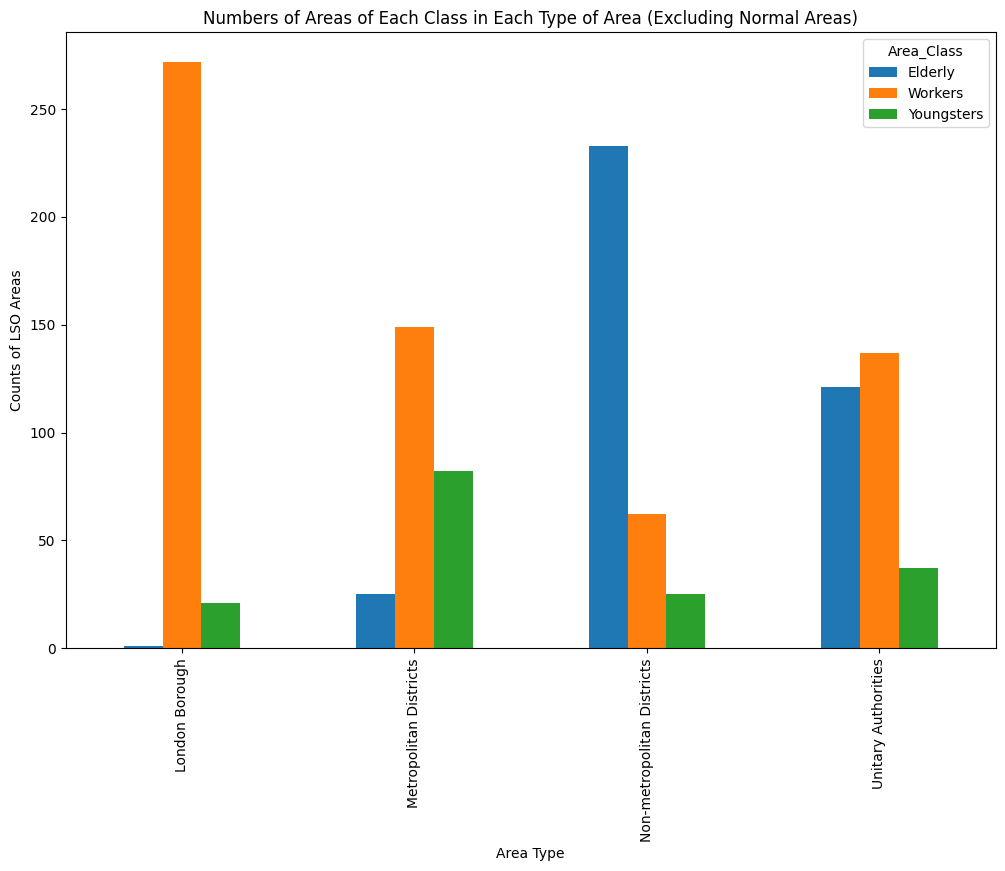

In [19]:
#Drop 'normal' column
area_type_pt_drop_normal= area_type_pt.drop(columns='Normal')

#Bar Chart 
area_type_pt_drop_normal.plot(kind='bar', figsize=(12,8))
plt.title('Numbers of Areas of Each Class in Each Type of Area (Excluding Normal Areas)')
plt.xlabel('Area Type')
plt.ylabel('Counts of LSO Areas')
plt.show()


Comments: 

**(a) London Borough**

London Boroughs are mostly populated by working-age individuals, with more than 250 areas classified as worker communities. This likely due to London's status as a major urban center, which attracts lots of people in the workforce. There are only 20 LSOAs area classified as young communities, and just one area in London Borough is represented as elderly communities. 

**(b) Metropolitan Districts**

Similar to the London Borough, most of the Metropolitan Districts are primarily represented as working areas, with about 150 areas  classified in this category, making the working-age population the prominant demographic. Youngsters areas are well-represented with around 80 areas, while about 25 areas account for elderly communities.

**(c) Non-Metropolitan Districts**

Non-Metropolitan Districts are dominantly populated by elderly, with over 200 areas classified as old communities. This is likely because these disticts are mostly rural and coastal areas, drawing the elderly who seek for peaceful and quiet environment. Workers area are less represented, with about 60 areas, and youngsters area are even less common, with only around 25 areas.

**(d) Unitary Authorities** 

Most of the areas in unitary authorities are represented by the mix of worker and elderly communities, with slightly more worker areas, outnumbering the elderly areas by around 16. There are approximately 40 areas classified as young communites. 



### 2.5 Mapping (Optional)

This section introduces GeoPandas which is a library for drawing maps.Map of following distributions across England LSOAs is plotted: 
- Median Age 
- Area Types
- Area Class
- Younger Proportion 
- Older Proportion

Text(0.5, 1.0, 'Median Age Across England LSOAs')

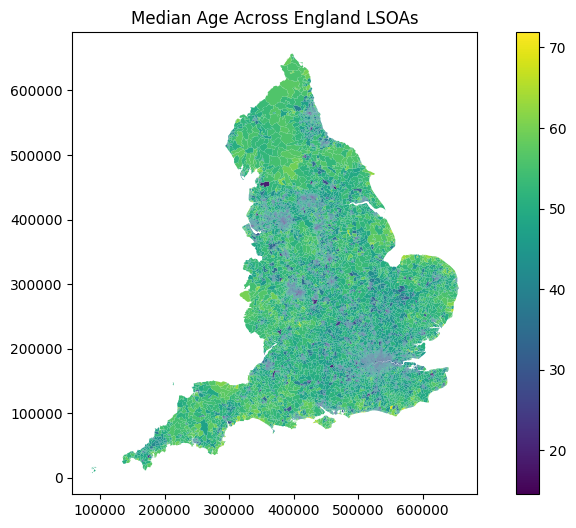

In [20]:
import geopandas as gpd
bdf= gpd.read_file('LSOA_England_geom.gpkg')

#Join lsoa_index_df 
bdf2= bdf.join(lsoa_index_df, how='right', on='LSOA21CD')

#GeoPandas 1 : Median Age Distribution 
gp1= bdf2.plot('Median_Age', legend =True, figsize=(10,6))
gp1.set_title('Median Age Across England LSOAs')


Text(0.5, 1.0, 'Area Types Across England LSOAs')

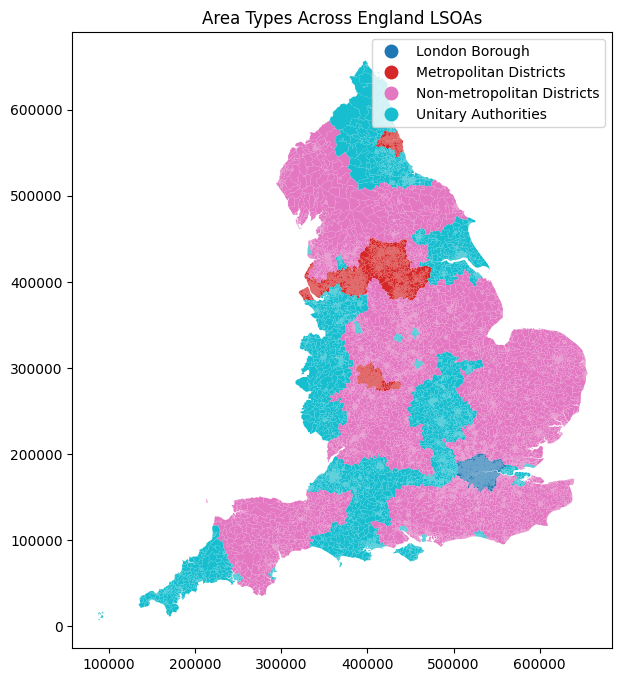

In [21]:
#GeoPandas 2 : Area Types Distribution 
gp2 = bdf2.plot('Area_type', legend =True, figsize=(10,8))
gp2.set_title('Area Types Across England LSOAs')

Text(0.5, 1.0, 'Area Class Across England LSOAs')

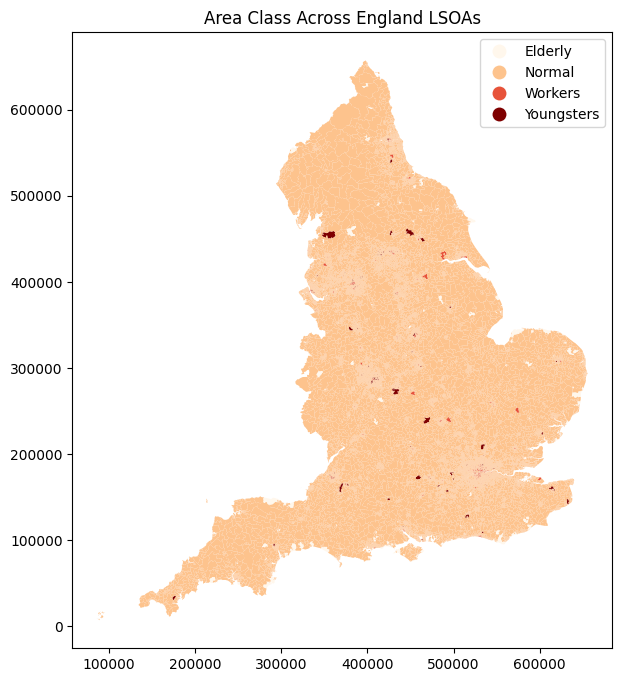

In [22]:
#GeoPandas 3: Area Class Distribution 
gp3 = bdf2.plot('Area_Class', legend =True, figsize=(10,8),cmap='OrRd')
gp3.set_title('Area Class Across England LSOAs')

Text(0.5, 1.0, 'Proportion of Youngsters Across England LSOAs')

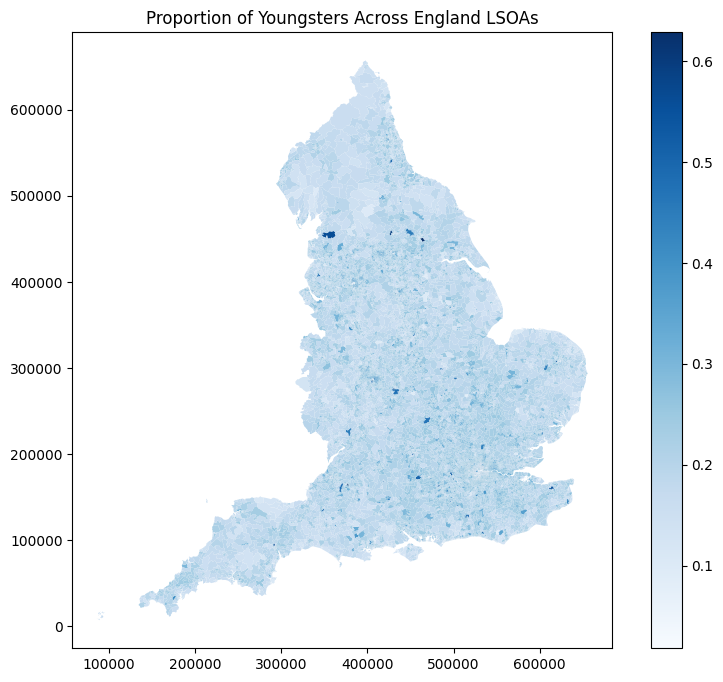

In [23]:
#GeoPandas 4: Younger Proportion Distribution 
gp4 = bdf2.plot('Younger_Proportion', legend =True, figsize=(10,8),cmap='Blues')
gp4.set_title('Proportion of Youngsters Across England LSOAs')

Text(0.5, 1.0, 'Proportion of Elderly Across England LSOAs')

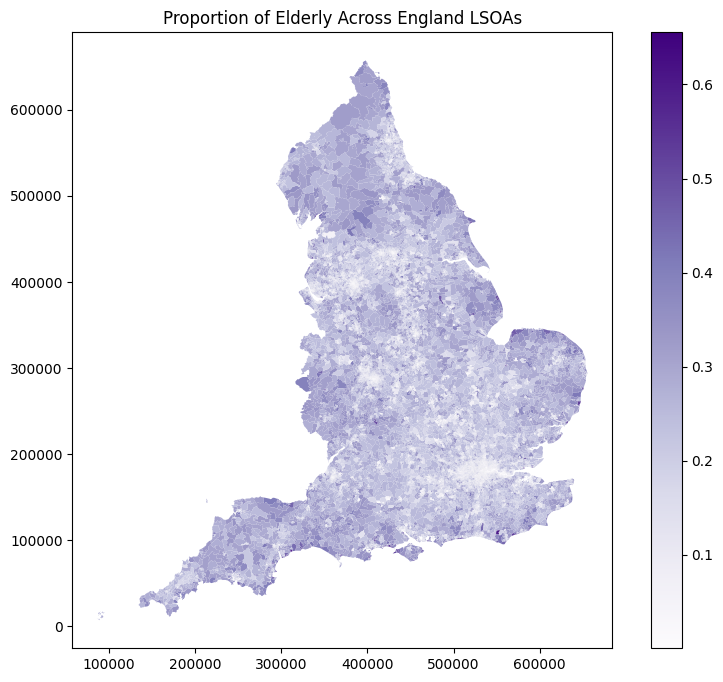

In [24]:
#GeoPandas 5: Older Proportion Distribution 
gp5 = bdf2.plot('Older_Proportion', legend =True, figsize=(10,8),cmap='Purples')
gp5.set_title('Proportion of Elderly Across England LSOAs')